In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [216]:
df6=pd.read_csv('Housing.csv')

In [217]:
df6.shape

(545, 9)

In [218]:
df3.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning
0,13300000,7420,4,2,3,yes,no,no,yes
1,12250000,8960,4,4,4,yes,no,no,yes
2,12250000,9960,3,2,2,yes,no,no,no
3,12215000,7500,4,2,2,yes,no,no,yes
4,11410000,7420,4,1,2,yes,yes,no,yes


In [219]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   price            545 non-null    int64 
 1   area             545 non-null    int64 
 2   bedrooms         545 non-null    int64 
 3   bathrooms        545 non-null    int64 
 4   stories          545 non-null    int64 
 5   mainroad         545 non-null    object
 6   guestroom        545 non-null    object
 7   hotwaterheating  545 non-null    object
 8   airconditioning  545 non-null    object
dtypes: int64(5), object(4)
memory usage: 38.4+ KB


In [220]:
df6.describe()

,price,area,bedrooms,bathrooms,stories
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000
mean,4.731344e+06,5121.381651,4.537615,1.467890,8.135780
std,1.898184e+06,2202.274055,27.144002,4.258143,147.749738
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000
25%,3.430000e+06,3540.000000,2.000000,1.000000,1.000000
50%,4.340000e+06,4510.000000,3.000000,1.000000,2.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000
max,1.330000e+07,16200.000000,563.000000,100.000000,3451.000000


In [221]:
cat_cols = df6.select_dtypes(include=['object']).columns

for col in cat_cols:
    print(df6[col].value_counts())

mainroad
yes    468
no      77
Name: count, dtype: int64
guestroom
no     448
yes     97
Name: count, dtype: int64
hotwaterheating
no     520
yes     25
Name: count, dtype: int64
airconditioning
no      372
yes     172
2345      1
Name: count, dtype: int64


In [222]:
cols = ['mainroad', 'guestroom', 'hotwaterheating', 'airconditioning']
df6[cols] = df6[cols].replace({'yes': 1, 'no': 0})

/tmp/ipython-input-2421410216.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df6[cols] = df6[cols].replace({'yes': 1, 'no': 0})


In [223]:
df6.drop(df6[df6['airconditioning']==2345].index, inplace=True)

In [233]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [225]:
x = df6.drop(columns=['price'])
y = df6['price']

In [226]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [227]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [228]:
gb = GradientBoostingRegressor(n_estimators=500, learning_rate=0.075, max_depth=3, random_state=42)

gb.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.075, n_estimators=500,
                          random_state=42)

In [229]:
y_pred = gb.predict(x_test)

In [234]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

RMSE: 1605360.9354711596
R2 Score: 0.5107519924108325
Mean Absolute Error (MAE): 1150202.2968332828


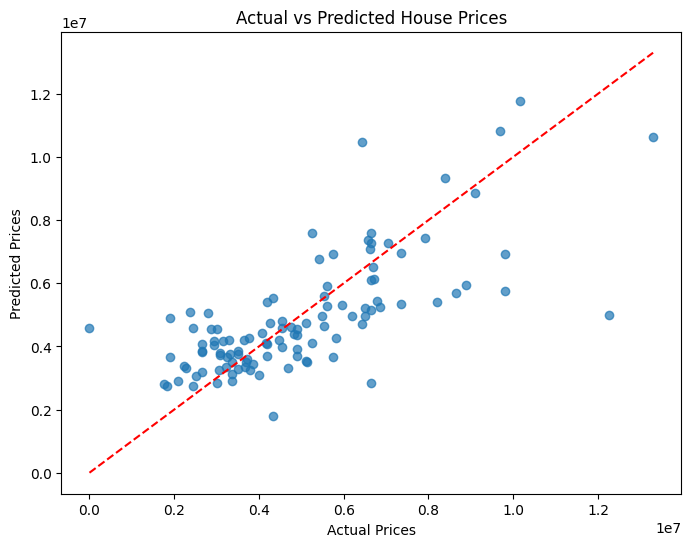

In [232]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


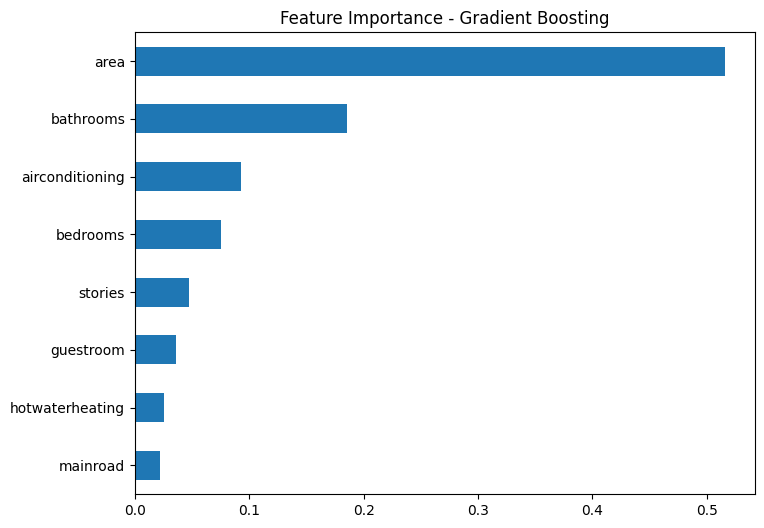

In [231]:
feat_importances = pd.Series(gb.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance - Gradient Boosting")
plt.show()